# Pattern Detection

In [1]:
# Importing libraries 

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
import matplotlib.pyplot as plt

## Data Pre-Processing

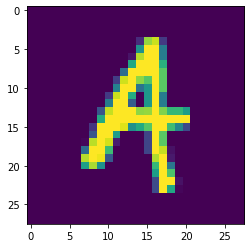

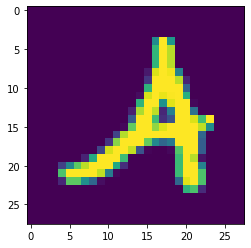

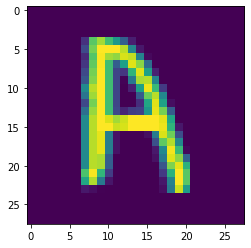

In [13]:
#defining Train and validation directory
train_dir = 'Main_dataset/Train'
validation_dir = 'Main_dataset/Test'
test_dir = 'Main_dataset/Test'

#looking at one of the samples of the dataset
for i in range(0,15,5):
    try_img = PIL.Image.open(train_dir+'/Normal/A-'+str(i)+'.png')
    plt.imshow(try_img)
    plt.show()

In [3]:
#checking the mode and size of the image in the dataset
print("Mode of the data: ", try_img.mode) # L -> GrayScale
print("Size of Images: ", try_img._size)

Mode of the data:  L
Size of Images:  (28, 28)


In [4]:
# importing glob to access the files
import glob

print("Normal: ", len(glob.glob(train_dir+'/Normal/*')))
print("Corrected: ", len(glob.glob(train_dir+'/Corrected/*')))
print("Reversal: ", len(glob.glob(train_dir+'/Reversal/*')))

Normal:  39334
Corrected:  65534
Reversal:  46781


In [18]:
#defining image and batch size
IMAGE_SIZE = try_img._size
BATCH_SIZE = 32            #hyperparameter

#Normalisation and data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,rotation_range=10)


train_generator = train_datagen.flow_from_directory(
    train_dir,   #path to the training dataset
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE, 
    class_mode ='categorical')  

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SIZE,
    batch_size = 1,
    class_mode='categorical')

Found 151649 images belonging to 3 classes.
Found 56723 images belonging to 3 classes.
Found 56723 images belonging to 3 classes.


## Model Architecture

In [6]:
INPUT_SHAPE = IMAGE_SIZE + (3, )
print(INPUT_SHAPE)

model = tf.keras.models.Sequential([                               
    tf.keras.layers.Conv2D(1, (3, 3), activation='relu', input_shape=INPUT_SHAPE, padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"), 
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

(28, 28, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 1)         28        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 1)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)   

In [7]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [8]:
STEPS_PER_EPOCH = 86115//BATCH_SIZE
VALIDATION_STEPS = 37439//BATCH_SIZE


In [9]:
history = model.fit(train_generator, 
            epochs=10,
            steps_per_epoch = STEPS_PER_EPOCH,
            validation_data = validation_generator,
            validation_steps = VALIDATION_STEPS, 
            verbose=1)

Epoch 1/10
2691/2691 [==============================] - 127s 47ms/step - loss: 0.5639 - accuracy: 0.7594 - val_loss: 0.5242 - val_accuracy: 0.7865
Epoch 2/10
2691/2691 [==============================] - 123s 46ms/step - loss: 0.4656 - accuracy: 0.8129 - val_loss: 0.4980 - val_accuracy: 0.7926
Epoch 3/10
2691/2691 [==============================] - 126s 47ms/step - loss: 0.4353 - accuracy: 0.8271 - val_loss: 0.4758 - val_accuracy: 0.8100
Epoch 4/10
2691/2691 [==============================] - 125s 46ms/step - loss: 0.4205 - accuracy: 0.8343 - val_loss: 0.4726 - val_accuracy: 0.8118
Epoch 5/10
2691/2691 [==============================] - 127s 47ms/step - loss: 0.4011 - accuracy: 0.8413 - val_loss: 0.4913 - val_accuracy: 0.8035
Epoch 6/10
2691/2691 [==============================] - 127s 47ms/step - loss: 0.3889 - accuracy: 0.8464 - val_loss: 0.4643 - val_accuracy: 0.8152
Epoch 7/10
2691/2691 [==============================] - 123s 46ms/step - loss: 0.3757 - accuracy: 0.8516 - val_loss: 0

In [19]:
model.evaluate(test_generator)

56723/56723 [==============================] - 57s 1ms/step - loss: 0.5450 - accuracy: 0.7644


[0.5449982285499573, 0.7643989324569702]

In [19]:
!pip install opencv-python

     |████████████████████████████████| 46.4 MB 958 kB/s  eta 0:00:01


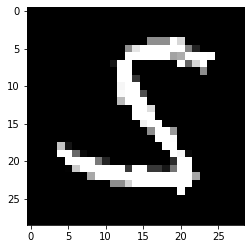

In [20]:
try_img = PIL.Image.open(validation_dir+'/Normal/A-102.png')
try_img

import cv2
img = cv2.imread(validation_dir+'/Reversal/1_4.png')
import matplotlib.pyplot as plt

plt.imshow(img)

In [21]:
img = cv2.resize(img,(28,28))
img.shape

(28, 28, 3)

In [22]:
img = np.expand_dims(img,0)

In [23]:
model.predict(img)

array([[0., 0., 1.]], dtype=float32)

In [24]:
model.save('main_model.h5')